In [1]:
import pandas as pd
df = pd.read_csv("macrodata.CSV", encoding='latin-1', engine = 'python')
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [2]:
import matplotlib.pyplot as plt

In [3]:
df["year"].unique()

array([1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009], dtype=int64)

Wykres GDP w latach

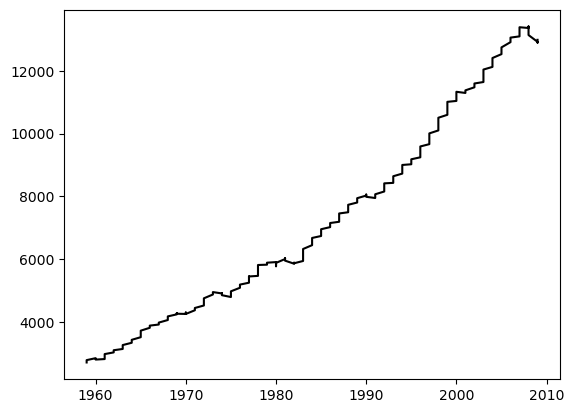

In [4]:
plt.plot(df["year"], df["realgdp"], 'k-')

Inny styl wykresu

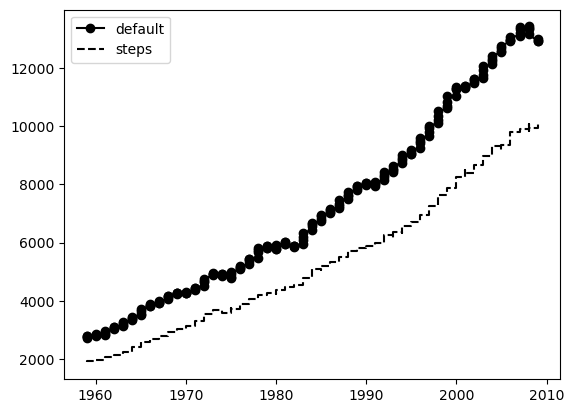

In [5]:
plt.plot(df["year"], df["realgdp"], 'ko-', label="default")
plt.plot(df["year"], df["realdpi"], 'k--', drawstyle='steps-post', label="steps")
plt.legend()

Grupy wykresów (rozmiar x, rozmiar y, identyfikator)

(array([32., 23., 32., 19., 25., 18., 10., 12., 14., 18.]),
 array([ 1886.9 ,  2705.96,  3525.02,  4344.08,  5163.14,  5982.2 ,
         6801.26,  7620.32,  8439.38,  9258.44, 10077.5 ]),
 <BarContainer object of 10 artists>)

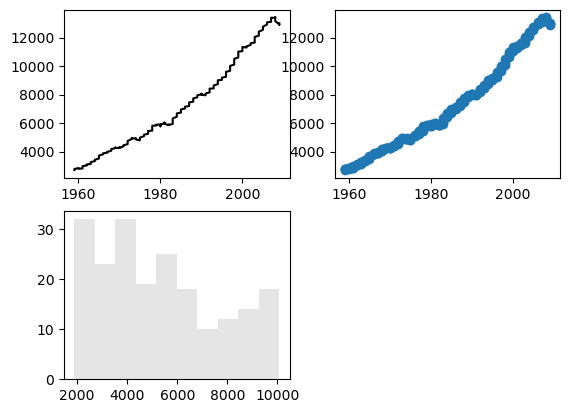

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.plot(df["year"], df["realgdp"], 'k-')

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df["year"], df["realgdp"])

ax3 = fig.add_subplot(2,2,3)
ax3.hist(df["realdpi"], bins = 10, color = 'k', alpha=0.1)

Legenda i etykiety osi

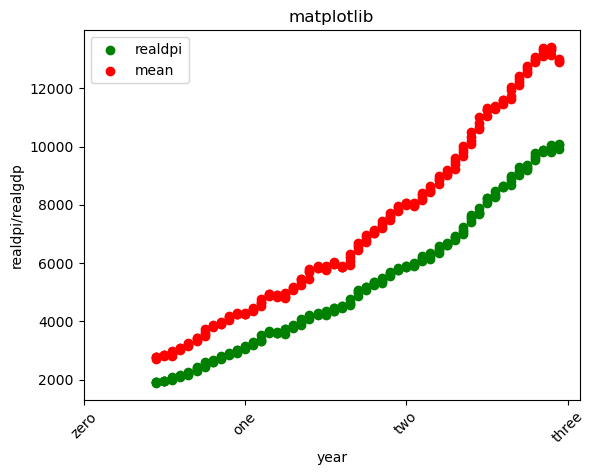

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df["year"], df["realdpi"], color='g', label="realdpi")
ax.scatter(df["year"], df["realgdp"], color='r', label="mean")
ax.set_xticks([1950, 1970, 1990, 2010])
ax.set_xticklabels(['zero', 'one', 'two', 'three'], rotation=45, fontsize='medium')
ax.set_title('matplotlib')
ax.set_xlabel('year')
ax.set_ylabel('realdpi/realgdp')
ax.legend(loc='best')

plt.savefig('figure.png', dpi=400, bbox_inches='tight')

Zapis do pliku
(ścieżka, dpi, ucinanie białych fragmentów wokół obrazu)
Zapis musi być wykonany przed wyświetleniem, inaczej obraz będzie pusty - (wyświetlenie czyści wykres)

In [8]:
plt.savefig('figure.png', dpi=400, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Wykresy pandas

<Axes: >

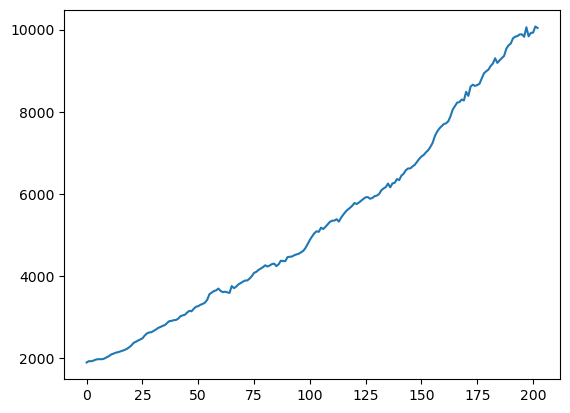

In [9]:
figure = pd.Series(df["realdpi"])
figure.plot()

<Axes: xlabel='year'>

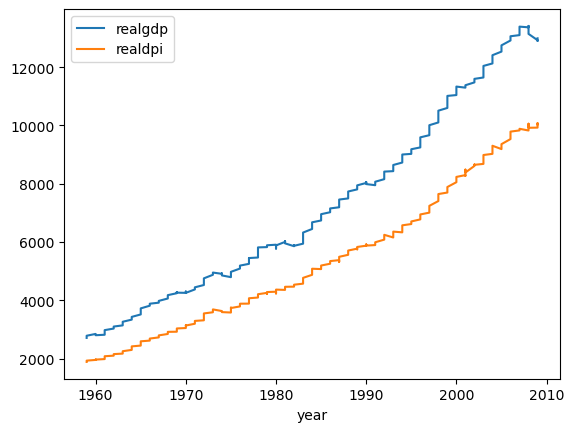

In [10]:
d4 = df[["realgdp", "realdpi", "year"]]
figure = d4
figure.plot(x = "year")

Wykresy kolumnowe

<Axes: >

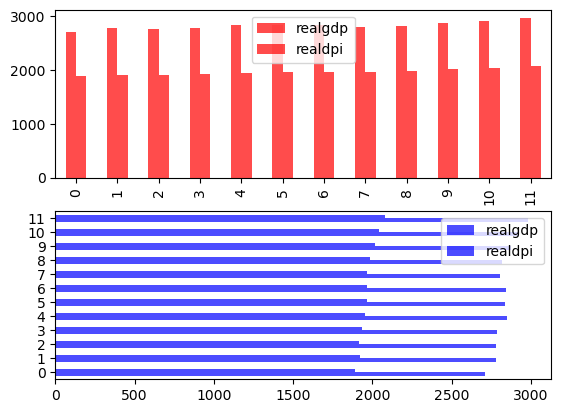

In [11]:
fig, axes = plt.subplots(2, 1)
d5 = d4[d4["year"] < 1962]
d5 = d5[["realgdp", "realdpi"]]
data = d5
data.plot.bar(ax=axes[0], color='r', alpha=0.7) #rysowanie w pionie
data.plot.barh(ax=axes[1], color='b', alpha=0.7) #rysowanie w poziomie

Seaborn

In [12]:
import seaborn as sbn
d7 = df
d7 = d7[d7["year"] == 1960]
d7

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
5,1960,2,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
6,1960,3,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960,4,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08


<Axes: xlabel='infl', ylabel='quarter'>

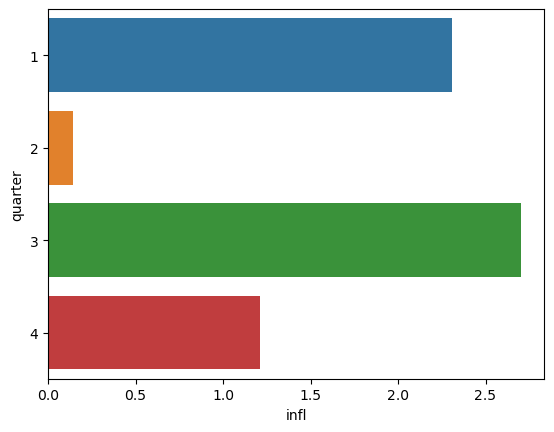

In [13]:
sbn.barplot(x='infl', y='quarter', data=d7, orient='h')

Dodanie nowej wartości kategorycznej hue

<Axes: xlabel='infl', ylabel='quarter'>

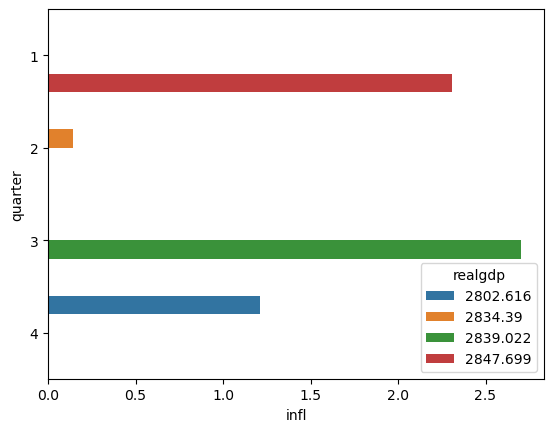

In [14]:
sbn.barplot(x='infl', y='quarter', hue='realgdp', data=d7, orient='h')

Histogram

In [15]:
d8 = df["realgdp"]
d8

0       2710.349
1       2778.801
2       2775.488
3       2785.204
4       2847.699
         ...    
198    13324.600
199    13141.920
200    12925.410
201    12901.504
202    12990.341
Name: realgdp, Length: 203, dtype: float64

<Axes: ylabel='Frequency'>

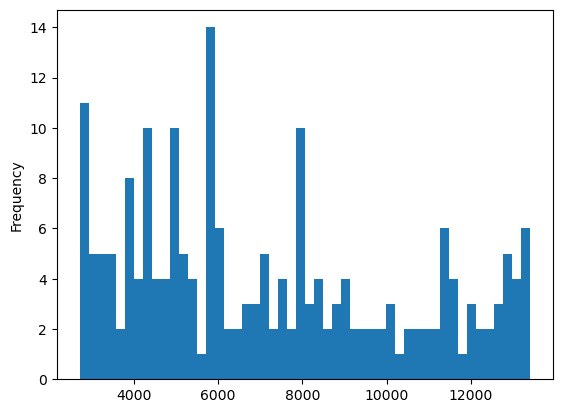

In [16]:
d8.plot.hist(bins=50)

Wykres gęstości - wykres prawdopodbieństwa obserwowanych danych

<Axes: ylabel='Density'>

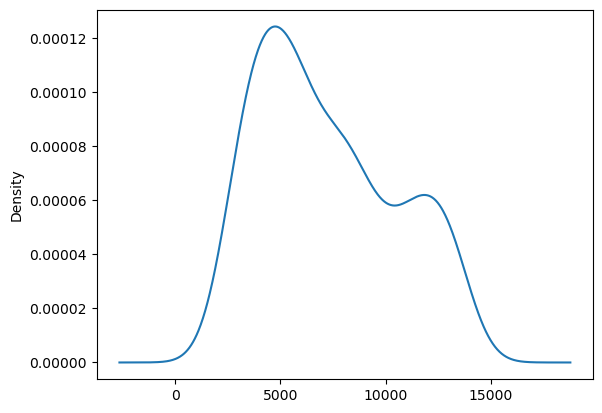

In [17]:
d8.plot.kde()

<Axes: ylabel='Density'>

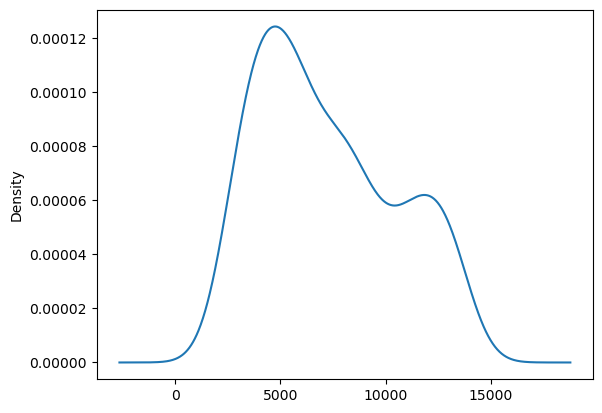

In [18]:
d8.plot.density()

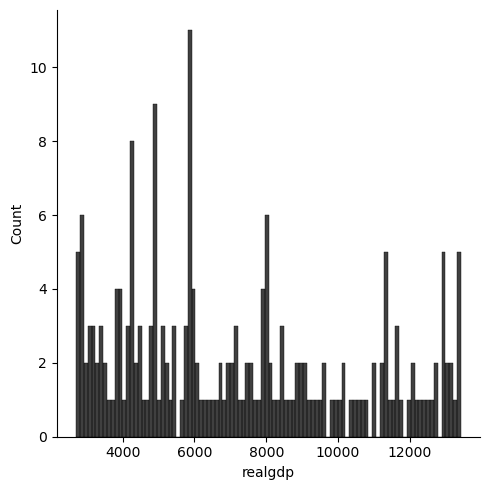

In [19]:
sbn.displot(d8, bins=100, color='k')

<Axes: xlabel='realgdp', ylabel='Count'>

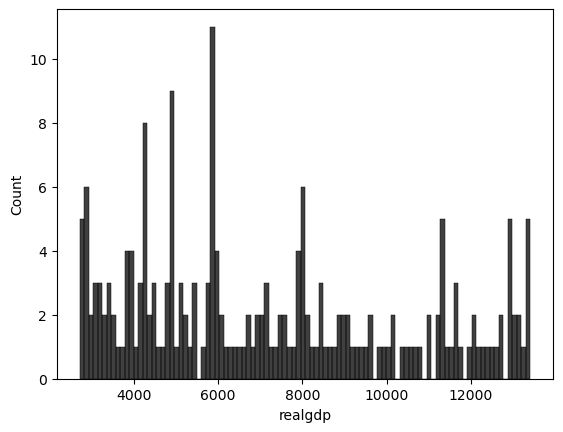

In [20]:
sbn.histplot(d8, bins=100, color='k')

Wykresy punktowe i bitowe

Text(0.5, 1.0, 'realgdp per quarter')

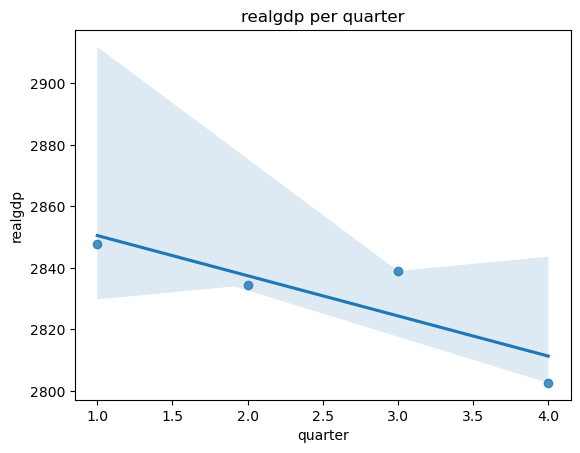

In [21]:
sbn.regplot(x='quarter', y='realgdp', data=d7)
plt.title('realgdp per quarter'.format('quarter', 'realgdp'))

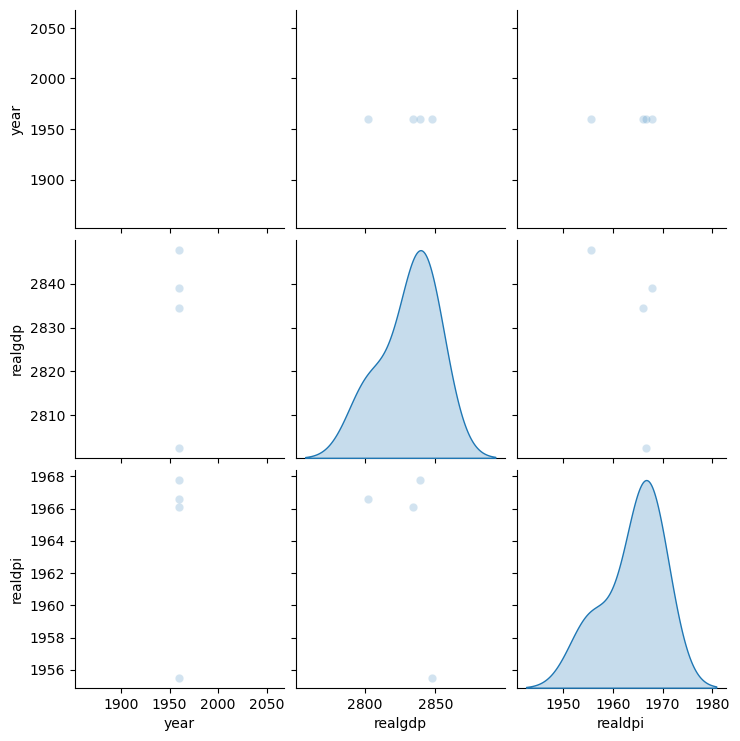

In [22]:
sbn.pairplot(d7[["year","realgdp","realdpi"]], diag_kind='kde', plot_kws={'alpha': 0.2})

Dane kategoryczne

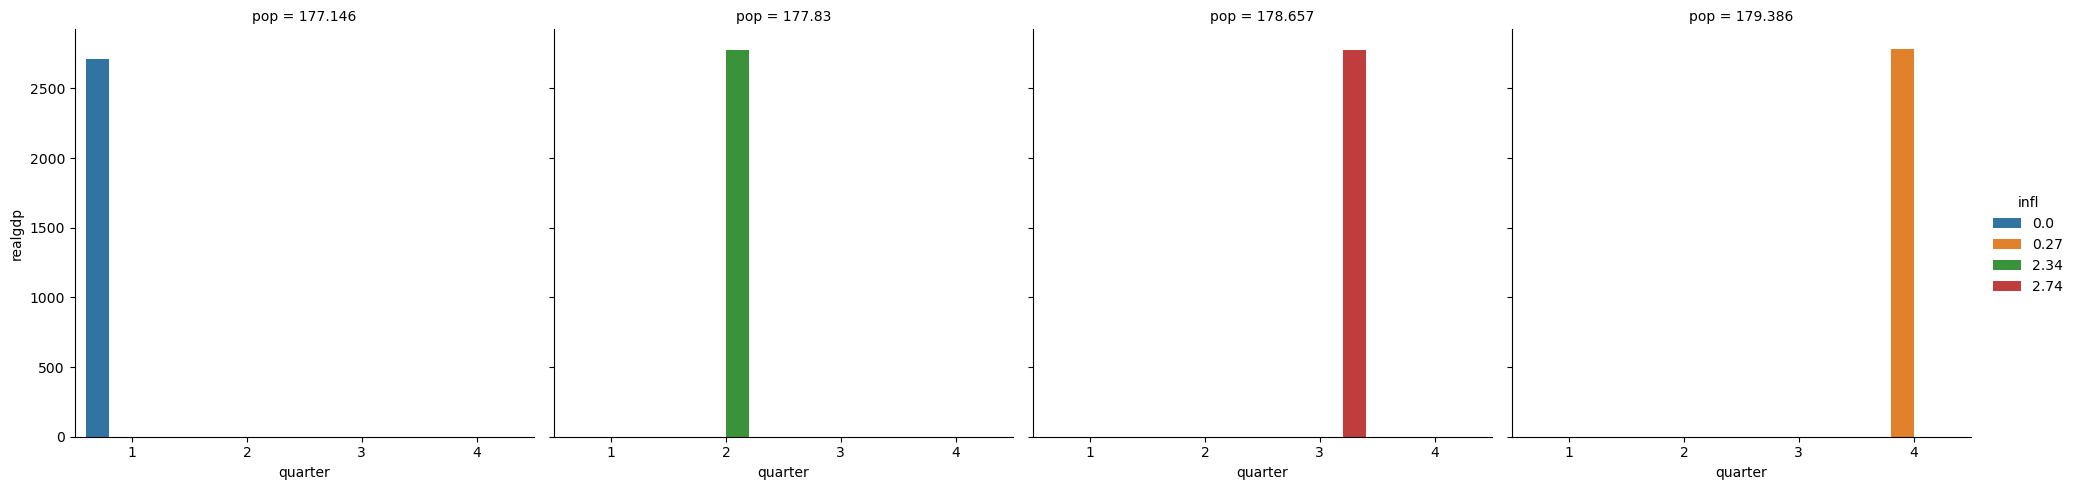

In [33]:
sbn.catplot(x='quarter', y='realgdp', hue='infl', col='pop', kind='bar', data=d8)
#danymi kategoryzującymi jest pop

Siatka aspektów

In [38]:
d8 = df[df["year"] < 1962]
d8

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
5,1960,2,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
6,1960,3,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960,4,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08
8,1961,1,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961,2,2872.005,1814.3,286.246,480.328,2014.4,29.92,142.9,2.29,7.0,183.691,1.47,0.81


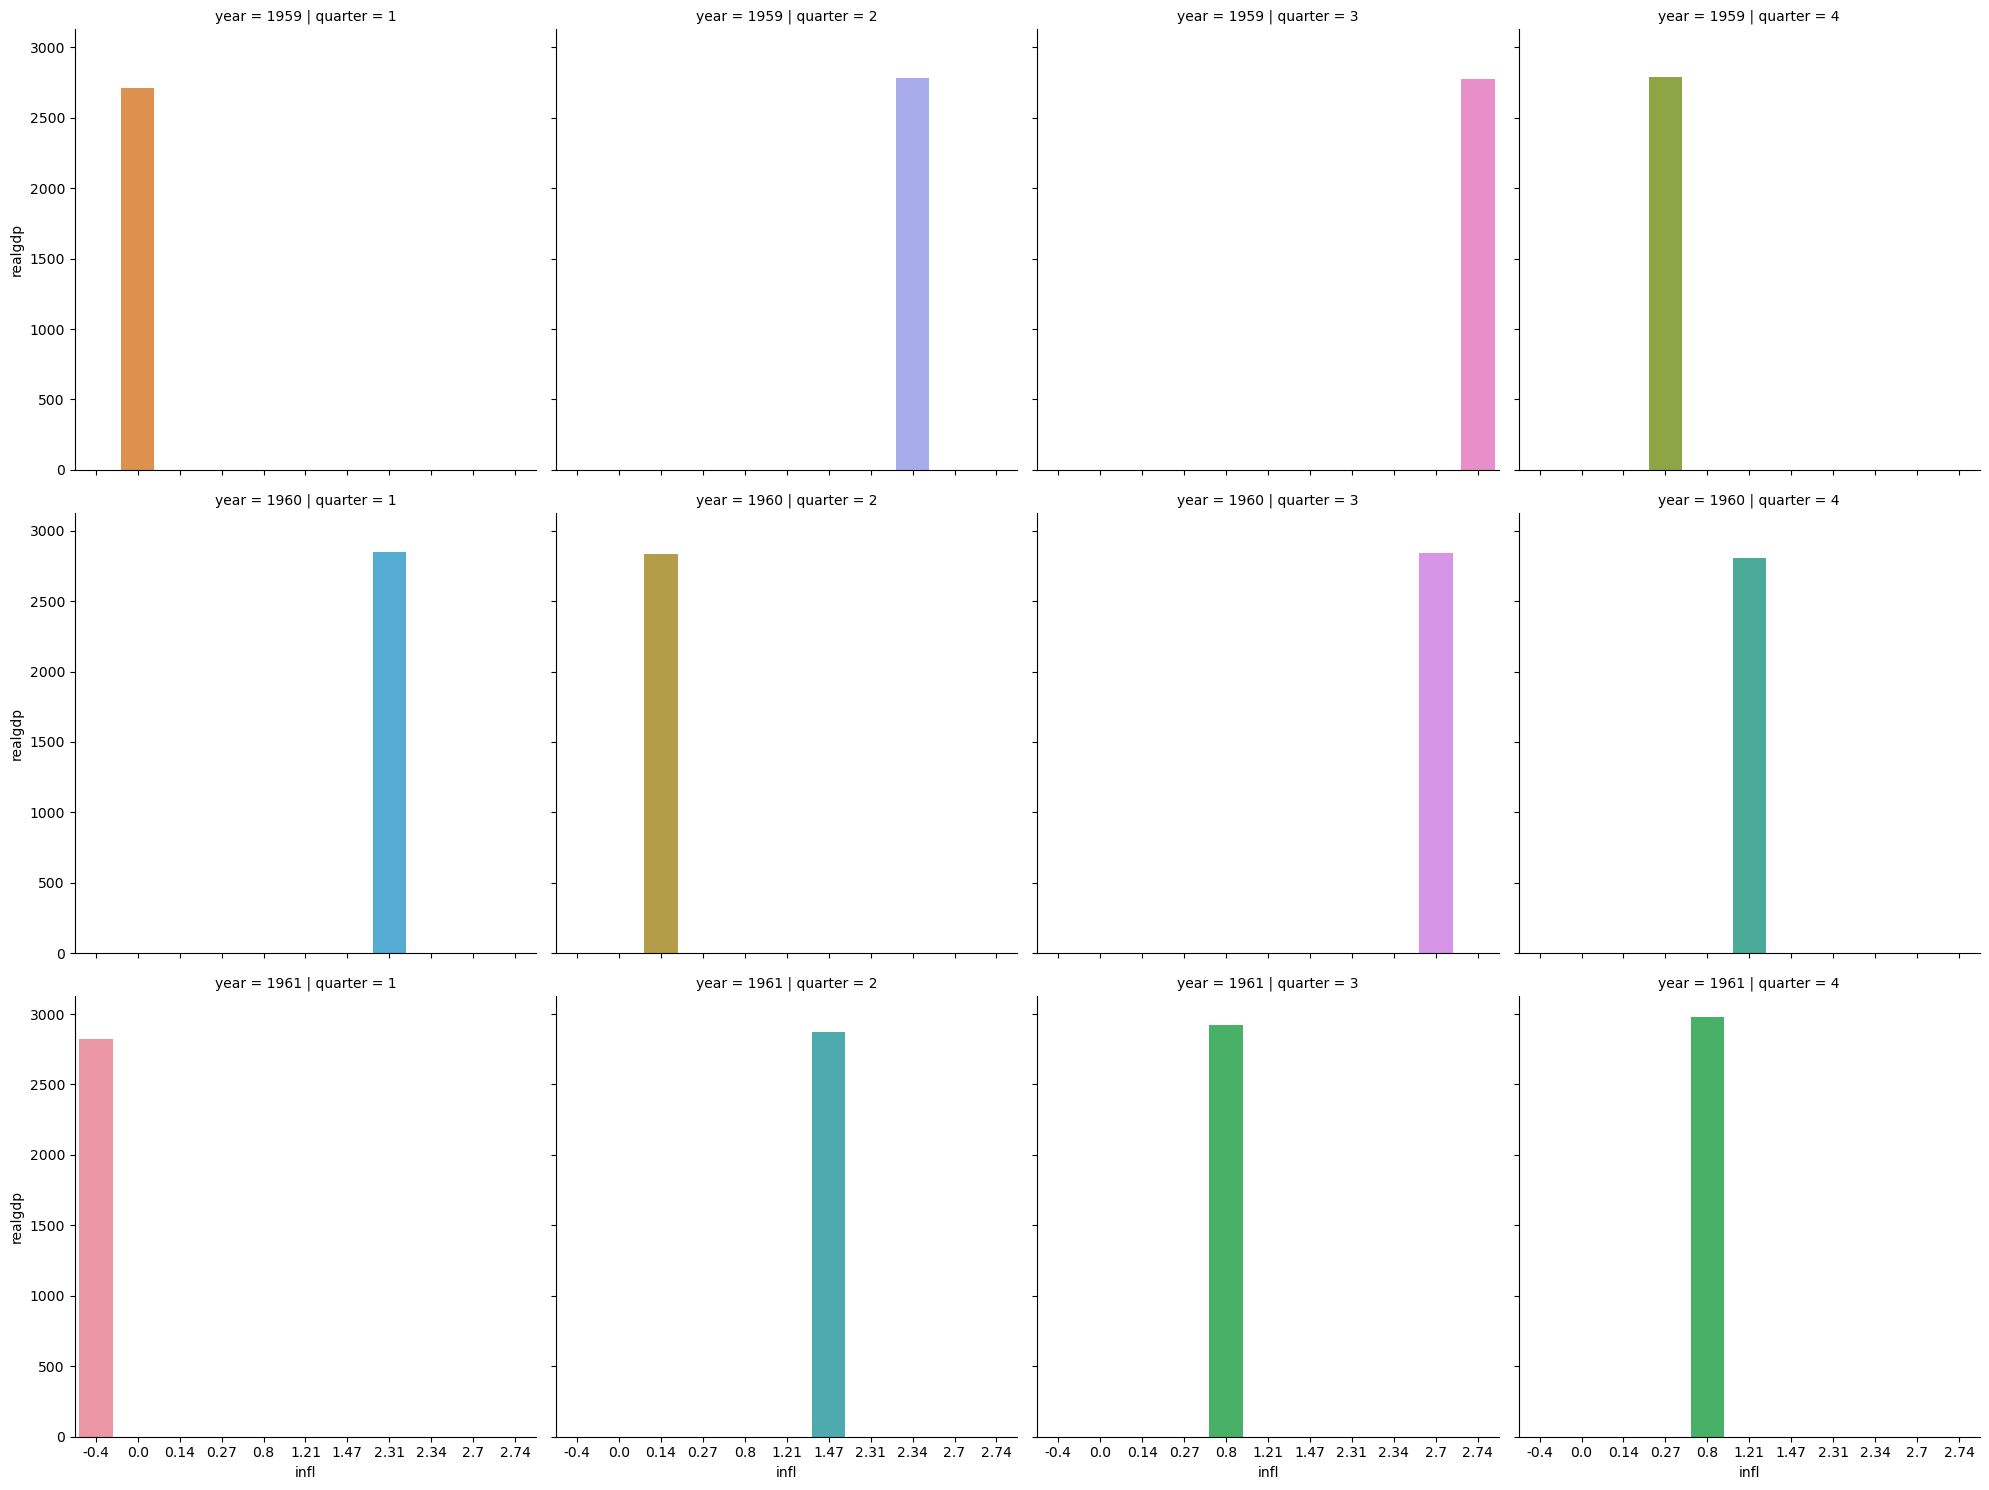

In [48]:
sbn.catplot(x='infl', y='realgdp', row='year', col='quarter', kind='bar', data=d8)

Wykresy blokowe

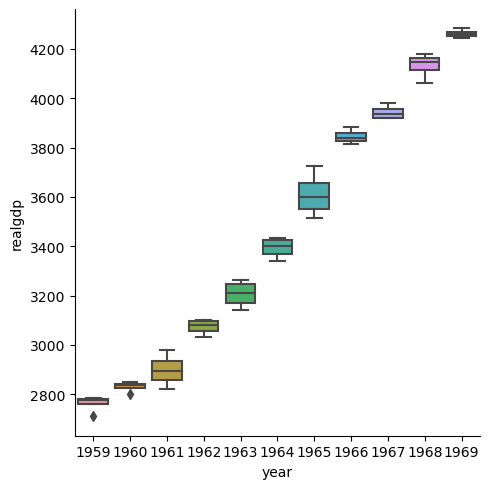

In [55]:
d9 = df[df["year"] < 1970]
sbn.catplot(x='year', y='realgdp', kind='box', data=d9)